# Analyzing Amazon Sales Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
file_path = 'Amazon Sales data.csv'  
df = pd.read_csv(file_path)

In [2]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
df.shape

(100, 14)

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
df["Ship Date"]=pd.to_datetime(df["Ship Date"])
df["Order Date"]=pd.to_datetime(df["Order Date"])
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

In [7]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
year                       int32
month                      int32
dtype: object

In [8]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'year',
       'month'],
      dtype='object')

In [9]:
#check missing values
missing_values=df.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
year              0
month             0
dtype: int64


There are no missinng values or null values in the data. Our data is already cleaned

In [10]:
df.groupby("Sales Channel").count()["Item Type"]

Sales Channel
Offline    50
Online     50
Name: Item Type, dtype: int64

<Axes: title={'center': 'Critical Priority items'}, xlabel='Item Type'>

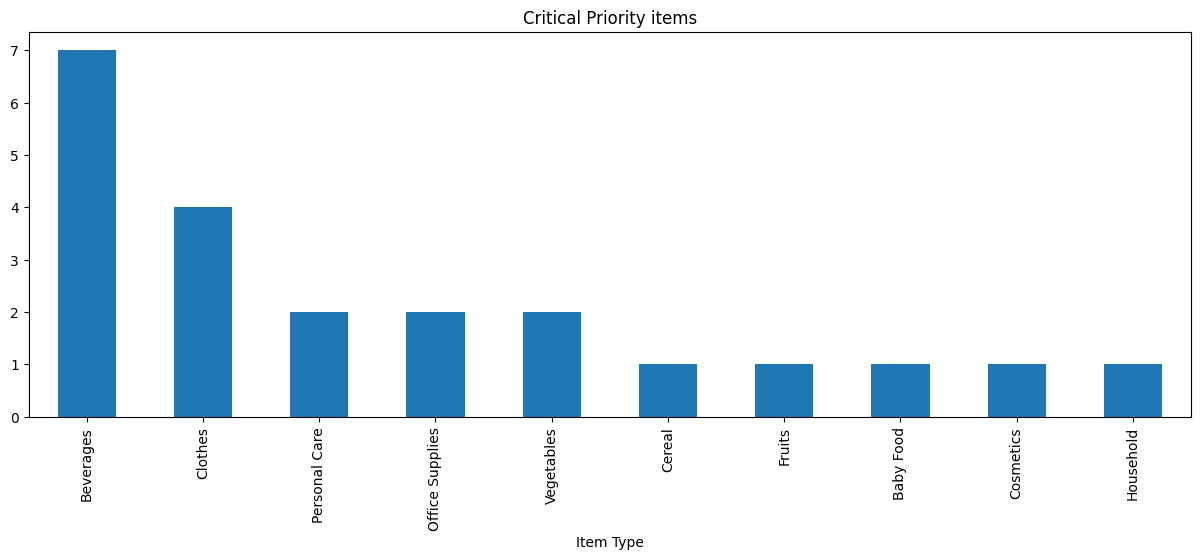

In [11]:
df[df['Order Priority']=="C"]["Item Type"].value_counts().plot(kind='bar',figsize=(15,5),title="Critical Priority items")

<Axes: title={'center': 'High Priority items'}, xlabel='Item Type'>

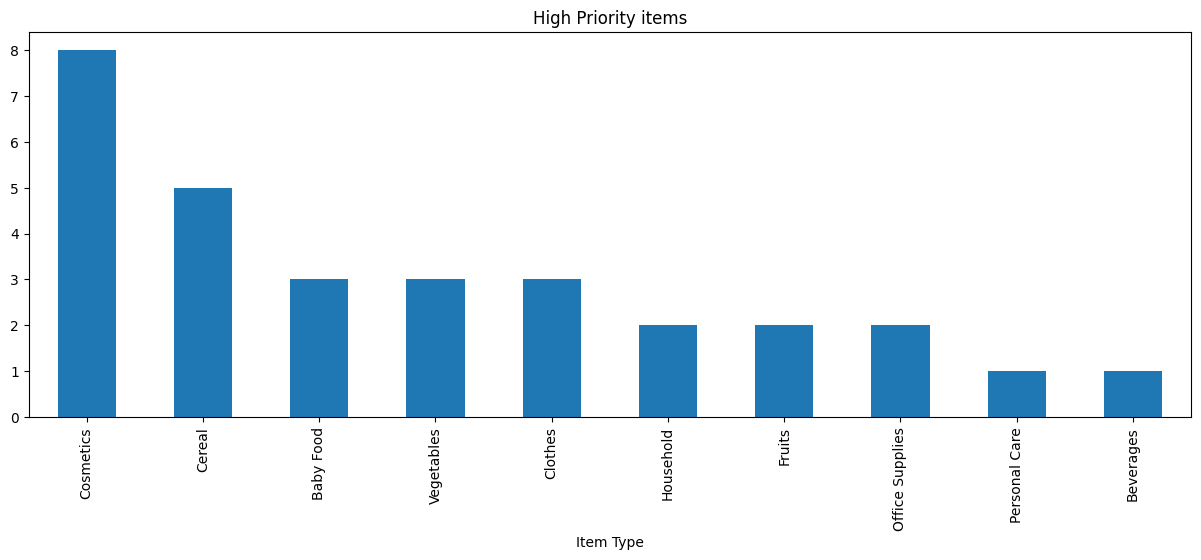

In [12]:
df[df['Order Priority']=="H"]["Item Type"].value_counts().plot(kind='bar',figsize=(15,5),title="High Priority items")

<Axes: title={'center': 'Medium Priority items'}, xlabel='Item Type'>

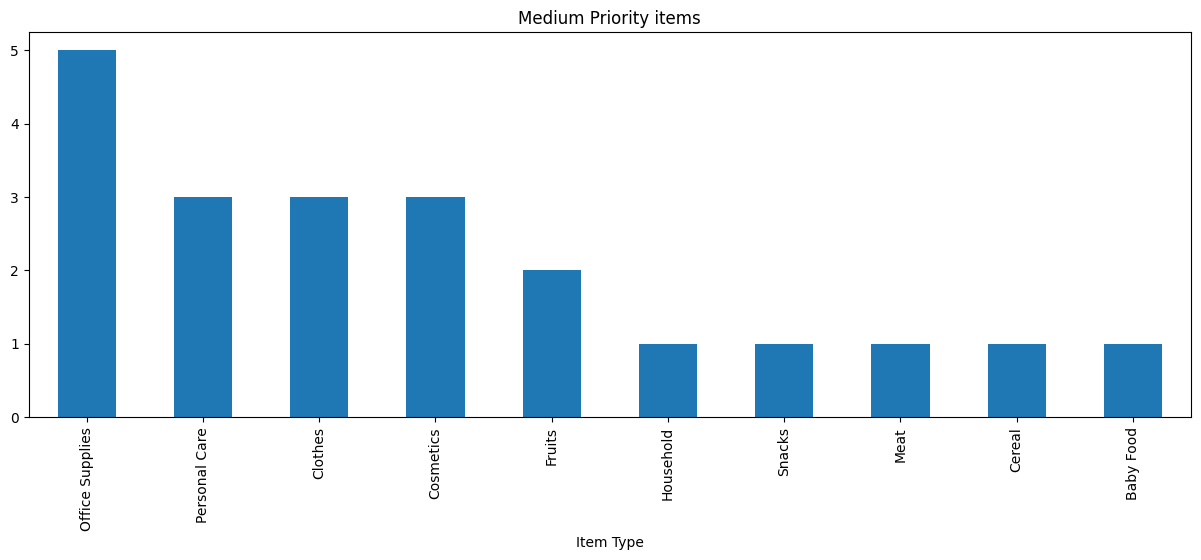

In [13]:
df[df['Order Priority']=="M"]["Item Type"].value_counts().plot(kind='bar',figsize=(15,5),title="Medium Priority items")

<Axes: title={'center': 'Low Priority items'}, xlabel='Item Type'>

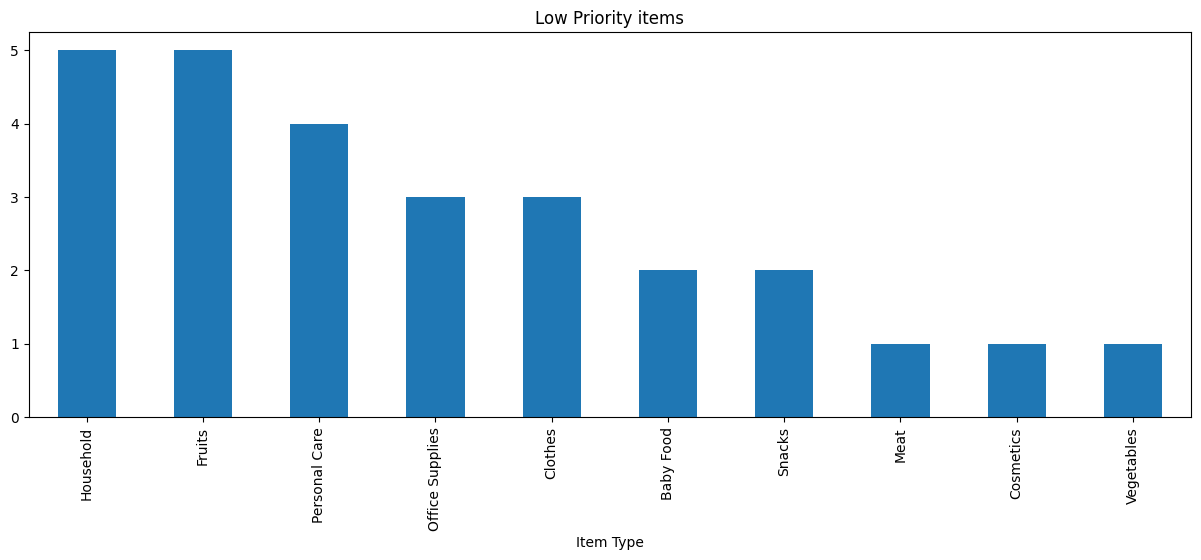

In [14]:
df[df['Order Priority']=="L"]["Item Type"].value_counts().plot(kind='bar',figsize=(15,5),title="Low Priority items")

In [15]:
#unique values present in data per column
for i in df.columns:
    print(f"{i} : {len(df[i].unique())}")

Region : 7
Country : 76
Item Type : 12
Sales Channel : 2
Order Priority : 4
Order Date : 100
Order ID : 100
Ship Date : 99
Units Sold : 99
Unit Price : 12
Unit Cost : 12
Total Revenue : 100
Total Cost : 100
Total Profit : 100
year : 8
month : 12


In [16]:
max(df["Order Date"])

Timestamp('2017-05-22 00:00:00')

In [17]:
min(df["Order Date"])

Timestamp('2010-02-02 00:00:00')

In [18]:
#calculate the Item Types
item_type=df["Item Type"].nunique()
print("Number of Item Types:", item_type)

Number of Item Types: 12


### Insights:
Most frequently ordered items

Critical priority: "Beverages, Clothes, personal care"

High priority: "cosmetics, cereal, Baby food"

Medium priority: "Office supplies, personal care, clothes"

Low priority: "Household, fruits, personal care"

First order was on 2010-02-02

Last order was on 2017-05-22

Total number of Orders is 100

Total number of items is 12

In [19]:
df["Item Type"].mode()

0      Clothes
1    Cosmetics
Name: Item Type, dtype: object

In [20]:
df.groupby("Region")["Item Type"].count()

Region
Asia                                 11
Australia and Oceania                11
Central America and the Caribbean     7
Europe                               22
Middle East and North Africa         10
North America                         3
Sub-Saharan Africa                   36
Name: Item Type, dtype: int64

Most frequently ordered items are Clothes and Cosmetics

Maximum orders are from Sub-Saharan Africa Region

Least Orders are from North America

In [21]:
#calculate the Total Revenue
total_revenue= df["Total Revenue"].sum()
print("Total Revenue:",total_revenue)

Total Revenue: 137348768.31


In [22]:
#calculate the Total Cost
total_cost=df["Total Cost"].sum()
print("Total Cost:",total_cost)

Total Cost: 93180569.91000001


In [23]:
#calculate the Total Profit
total_profit=df["Total Profit"].sum()
print("Toatl Profit:",total_profit)

Toatl Profit: 44168198.39999999


In [24]:
df.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

In [25]:
# Sales by product type
product_sales = df.groupby('Item Type')['Total Revenue'].sum().reset_index()
top_products = product_sales.sort_values(by='Total Revenue', ascending=False).head(10)

# Sales by region
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()
top_regions = region_sales.sort_values(by='Total Revenue', ascending=False).head(10)

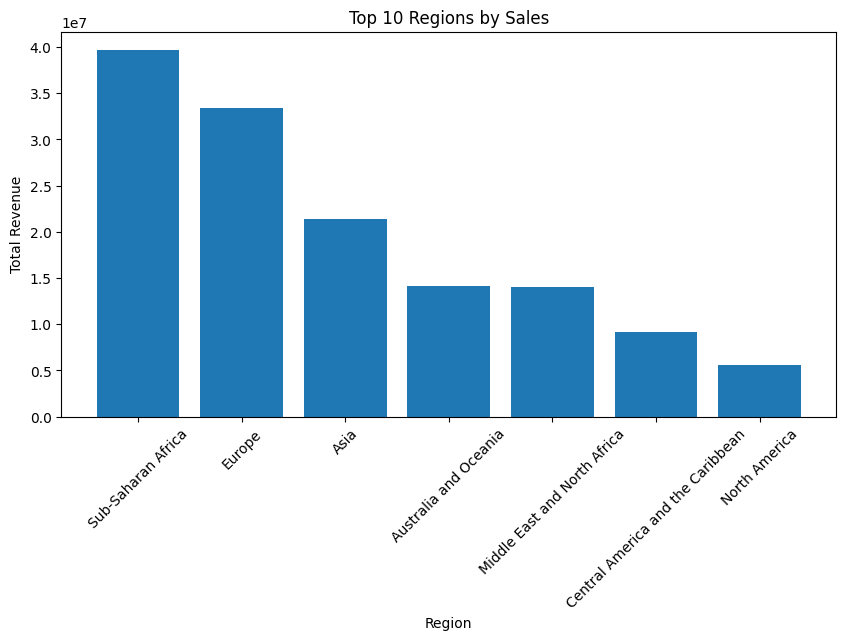

In [26]:
# Plot top regions
plt.figure(figsize=(10, 5))
plt.bar(top_regions['Region'], top_regions['Total Revenue'])
plt.title('Top 10 Regions by Sales')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Analysis:

Asia, Central America and the Caribbean, Europe and Sub Saharan Africa are having more profit in Offline Sales.

Sub-Saharan Africa has the highest Offline Sales and Europe has the highest Online Sales

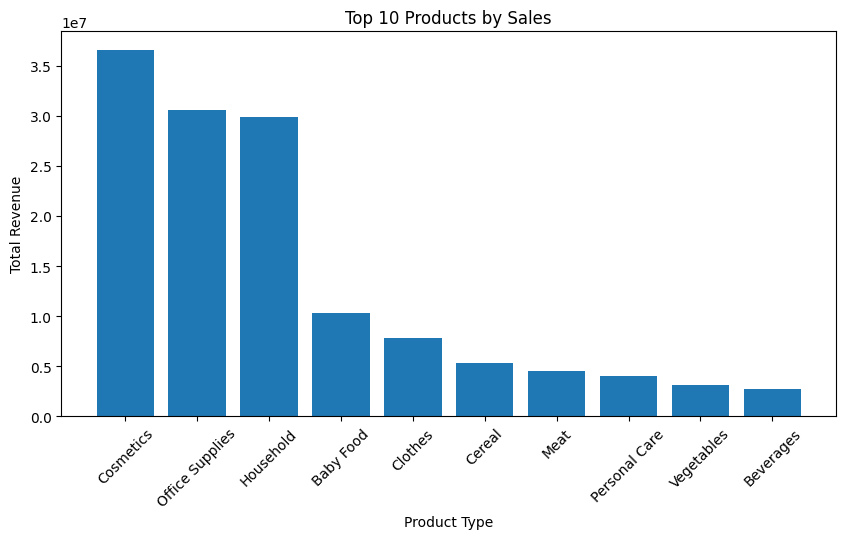

In [27]:
# Plot top products
plt.figure(figsize=(10, 5))
plt.bar(top_products['Item Type'], top_products['Total Revenue'])
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [28]:
total_sales = df['Total Revenue'].sum()
total_sales

137348768.31

In [29]:
df_amazon=df.copy()

In [30]:
df_amazon.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
year                       int32
month                      int32
dtype: object

In [31]:
df_amazon["Year"]=df_amazon["Ship Date"].dt.year
df_amazon["Month"]=df_amazon["Ship Date"].dt.month
df_amazon["Month-Year"]=df_amazon["Ship Date"].dt.strftime("%m-%y")
df_amazon["Unit Margin"]=df_amazon["Unit Price"]-df_amazon["Unit Cost"]
df_amazon["Total Sales"]=df_amazon["Units Sold"]*df_amazon["Unit Price"]

In [32]:
df_amazon

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,...,Total Revenue,Total Cost,Total Profit,year,month,Year,Month,Month-Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,...,2533654.00,1582243.50,951410.50,2010,5,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,...,576782.80,328376.44,248406.36,2012,8,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,...,1158502.59,933903.84,224598.75,2014,5,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,...,75591.66,56065.84,19525.82,2014,6,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,...,3296425.02,2657347.52,639077.50,2013,2,2013,2,02-13,126.25,3296425.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,...,97040.64,31825.92,65214.72,2011,7,2011,9,09-11,73.44,97040.64
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,...,58471.11,43367.64,15103.47,2011,11,2011,12,12-11,2.41,58471.11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,...,228779.10,135031.05,93748.05,2016,6,2016,6,06-16,63.13,228779.10
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,...,471336.91,326815.89,144521.02,2015,7,2015,8,08-15,25.06,471336.91


In [33]:
df_amazon.to_csv("Amazon_sales_new.csv")

In [34]:
df_amazon

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,...,Total Revenue,Total Cost,Total Profit,year,month,Year,Month,Month-Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,...,2533654.00,1582243.50,951410.50,2010,5,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,...,576782.80,328376.44,248406.36,2012,8,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,...,1158502.59,933903.84,224598.75,2014,5,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,...,75591.66,56065.84,19525.82,2014,6,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,...,3296425.02,2657347.52,639077.50,2013,2,2013,2,02-13,126.25,3296425.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,...,97040.64,31825.92,65214.72,2011,7,2011,9,09-11,73.44,97040.64
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,...,58471.11,43367.64,15103.47,2011,11,2011,12,12-11,2.41,58471.11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,...,228779.10,135031.05,93748.05,2016,6,2016,6,06-16,63.13,228779.10
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,...,471336.91,326815.89,144521.02,2015,7,2015,8,08-15,25.06,471336.91


In [35]:
df_amazon.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'year',
       'month', 'Year', 'Month', 'Month-Year', 'Unit Margin', 'Total Sales'],
      dtype='object')

### Monthly Trend Analysis

In [36]:
monthly_sales = df.groupby(['year', 'month'])['Total Revenue'].sum().reset_index()

In [37]:
monthly_sales

,year,month,Total Revenue
0,2010,2,3410661.12
1,2010,5,2587973.26
2,2010,6,1082418.40
3,2010,10,6064933.75
4,2010,11,3458252.00
5,2010,12,2581786.39
6,2011,1,1042225.35
7,2011,2,387002.20
8,2011,4,2798046.49
9,2011,5,272410.45


In [38]:
df_amazon["Ship Date"].dt.strftime("%b")
Monthly_sales=df_amazon.groupby("Month").sum(numeric_only=True)
Monthly_sales["Total Sales"].reset_index()

,Month,Total Sales
0,1,8884502.45
1,2,21105331.41
2,3,11322021.69
3,4,7402746.81
4,5,11945263.42
5,6,12019913.42
6,7,6016768.51
7,8,11050846.65
8,9,4188045.51
9,10,5314762.56


array([<Axes: ylabel='Total Sales'>], dtype=object)

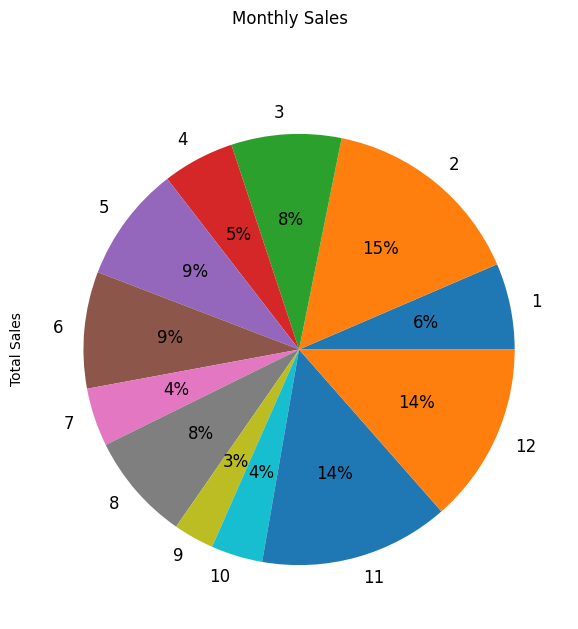

In [39]:
Monthly_sales["Total Sales"].plot(kind="pie",subplots=True,autopct='%1.0f%%',figsize=(7,7),fontsize=12,title="Monthly Sales")

Highest Monthly Sales are of February i.e 15%, then November and December with equal sales of 14%.

In [40]:
#Grouping by Items to get maximum sales per item in a month
Monthly_sales_data=df_amazon.groupby(["Item Type","Month"]).sum(numeric_only=True)
Monthly_sales_data=Monthly_sales_data.sort_values("Total Sales",ascending=False)
Monthly_sales_data["Total Sales"].head(10)

Item Type        Month
Cosmetics        12       13211309.60
Office Supplies  11       10894092.09
Household        2         9772112.21
Office Supplies  5         8789381.37
Cosmetics        8         8545511.20
Baby Food        6         6634471.92
Office Supplies  2         5892799.29
Household        3         5513227.50
                 12        4647149.58
Cosmetics        10        3786589.20
Name: Total Sales, dtype: float64

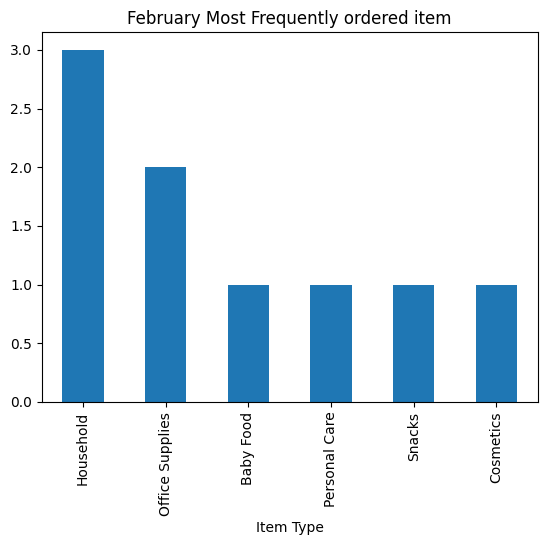

In [41]:
df_amazon[df_amazon['Month']==2]['Item Type'].value_counts().plot(kind="bar",title="February Most Frequently ordered item")
plt.show()

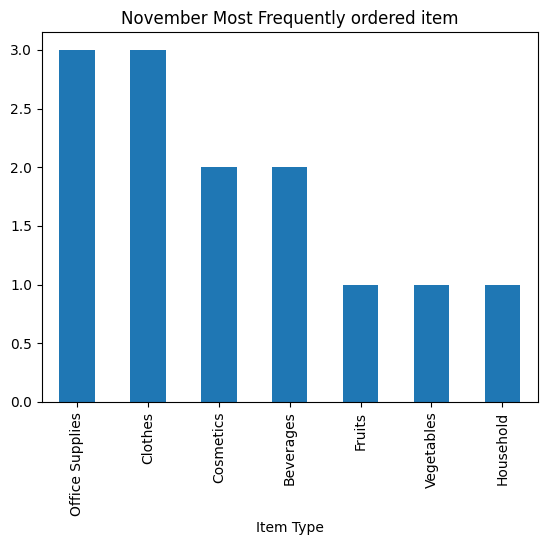

In [42]:
df_amazon[df_amazon['Month']==11]['Item Type'].value_counts().plot(kind="bar",title="November Most Frequently ordered item")
plt.show()

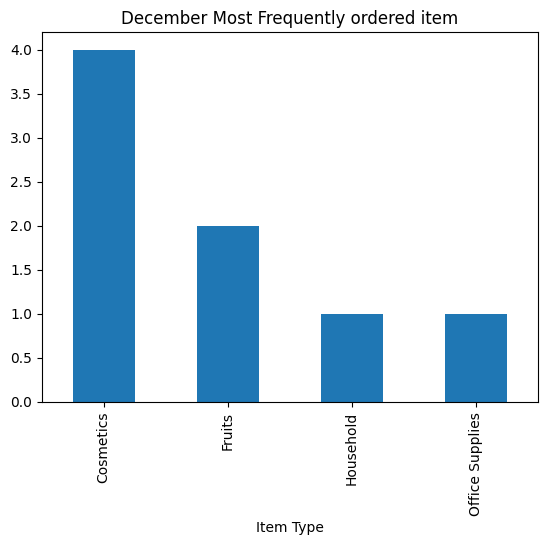

In [43]:
df_amazon[df_amazon['Month']==12]['Item Type'].value_counts().plot(kind="bar",title="December Most Frequently ordered item")
plt.show()

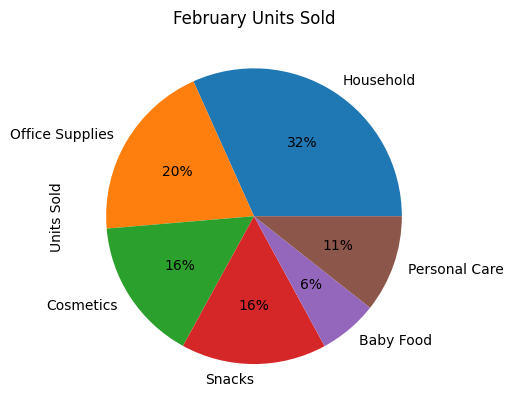

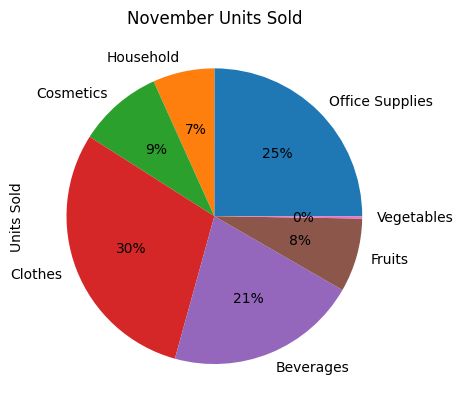

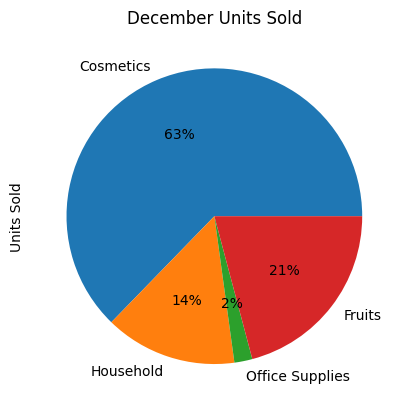

In [44]:
Monthly_sales_data.reset_index()[Monthly_sales_data.reset_index()["Month"]==2].set_index("Item Type").plot(kind="pie",y="Units Sold",autopct="%1.0f%%",legend=False,title="February Units Sold")
Monthly_sales_data.reset_index()[Monthly_sales_data.reset_index()["Month"]==11].set_index("Item Type").plot(kind="pie",y="Units Sold",autopct="%1.0f%%",legend=False,title="November Units Sold")
Monthly_sales_data.reset_index()[Monthly_sales_data.reset_index()["Month"]==12].set_index("Item Type").plot(kind="pie",y="Units Sold",autopct="%1.0f%%",legend=False,title="December Units Sold")
plt.show()

In [45]:
Monthly_sales_data.reset_index()["Item Type"].value_counts()

Item Type
Cosmetics          8
Household          7
Clothes            7
Office Supplies    6
Cereal             6
Personal Care      6
Fruits             6
Baby Food          5
Vegetables         5
Beverages          5
Snacks             3
Meat               2
Name: count, dtype: int64

<Axes: title={'center': 'Most Frequently ordered items'}, xlabel='Month,Item Type'>

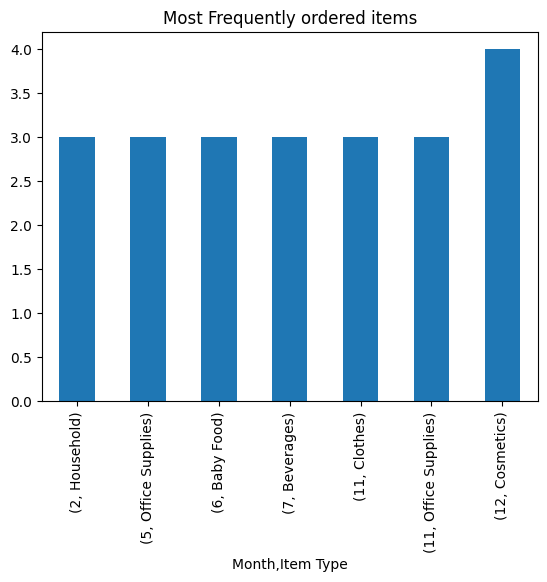

In [46]:
most_frequent=df_amazon.groupby("Month")["Item Type"].value_counts()
most_frequent[most_frequent>2].plot(kind="bar",title="Most Frequently ordered items")

Most Frequently ordered items from the top 3 months are:
    February has Household products with 32%
    November has office supplies with 25%
    December has Cosmetics with 60%
    
The most common items ordered for most of the months are Cosmetics, Household, clothes, office supplies, cereal, personal care, fruits

### Yearly Trend Analysis

In [47]:
Yearly_sales=df_amazon.groupby("Year")[["Total Sales","Total Profit"]].sum().reset_index()
Yearly_sales

,Year,Total Sales,Total Profit
0,2010,16604238.53,5987980.15
1,2011,11459719.49,2946149.26
2,2012,34149877.49,9649456.37
3,2013,20156772.41,6662167.54
4,2014,16803890.68,5932714.18
5,2015,12427982.86,3996539.44
6,2016,12372867.22,4903838.01
7,2017,13373419.63,4089353.45


array([<Axes: ylabel='Total Sales'>, <Axes: ylabel='Total Profit'>],
      dtype=object)

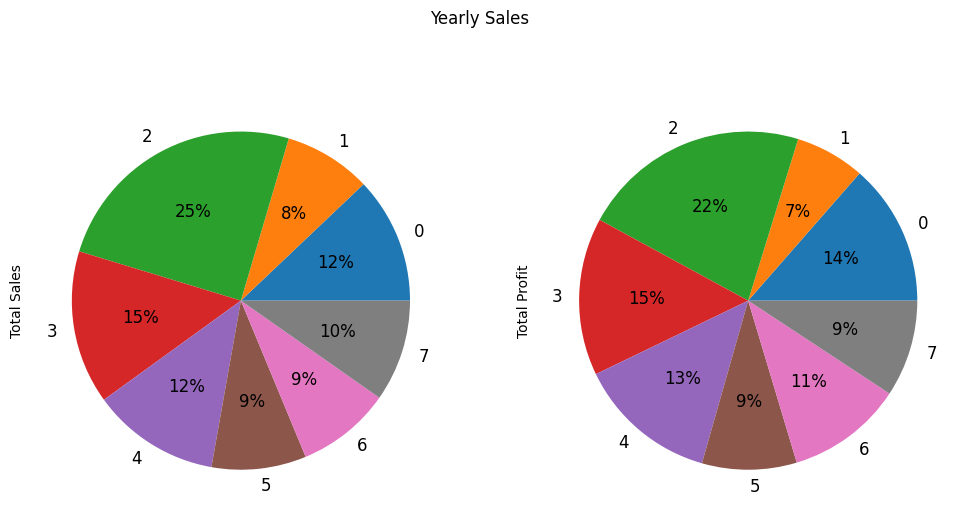

In [48]:
Yearly_sales[["Total Sales","Total Profit"]].plot(kind="pie",subplots=True,autopct='%1.0f%%',fontsize=12,title='Yearly Sales',legend=False,figsize=(12,6))

In [49]:
yearly_sales_data=df_amazon.groupby(["Item Type","Year"]).sum(numeric_only=True)

In [50]:
yearly_sales_data=yearly_sales_data.sort_values("Total Sales",ascending=False)

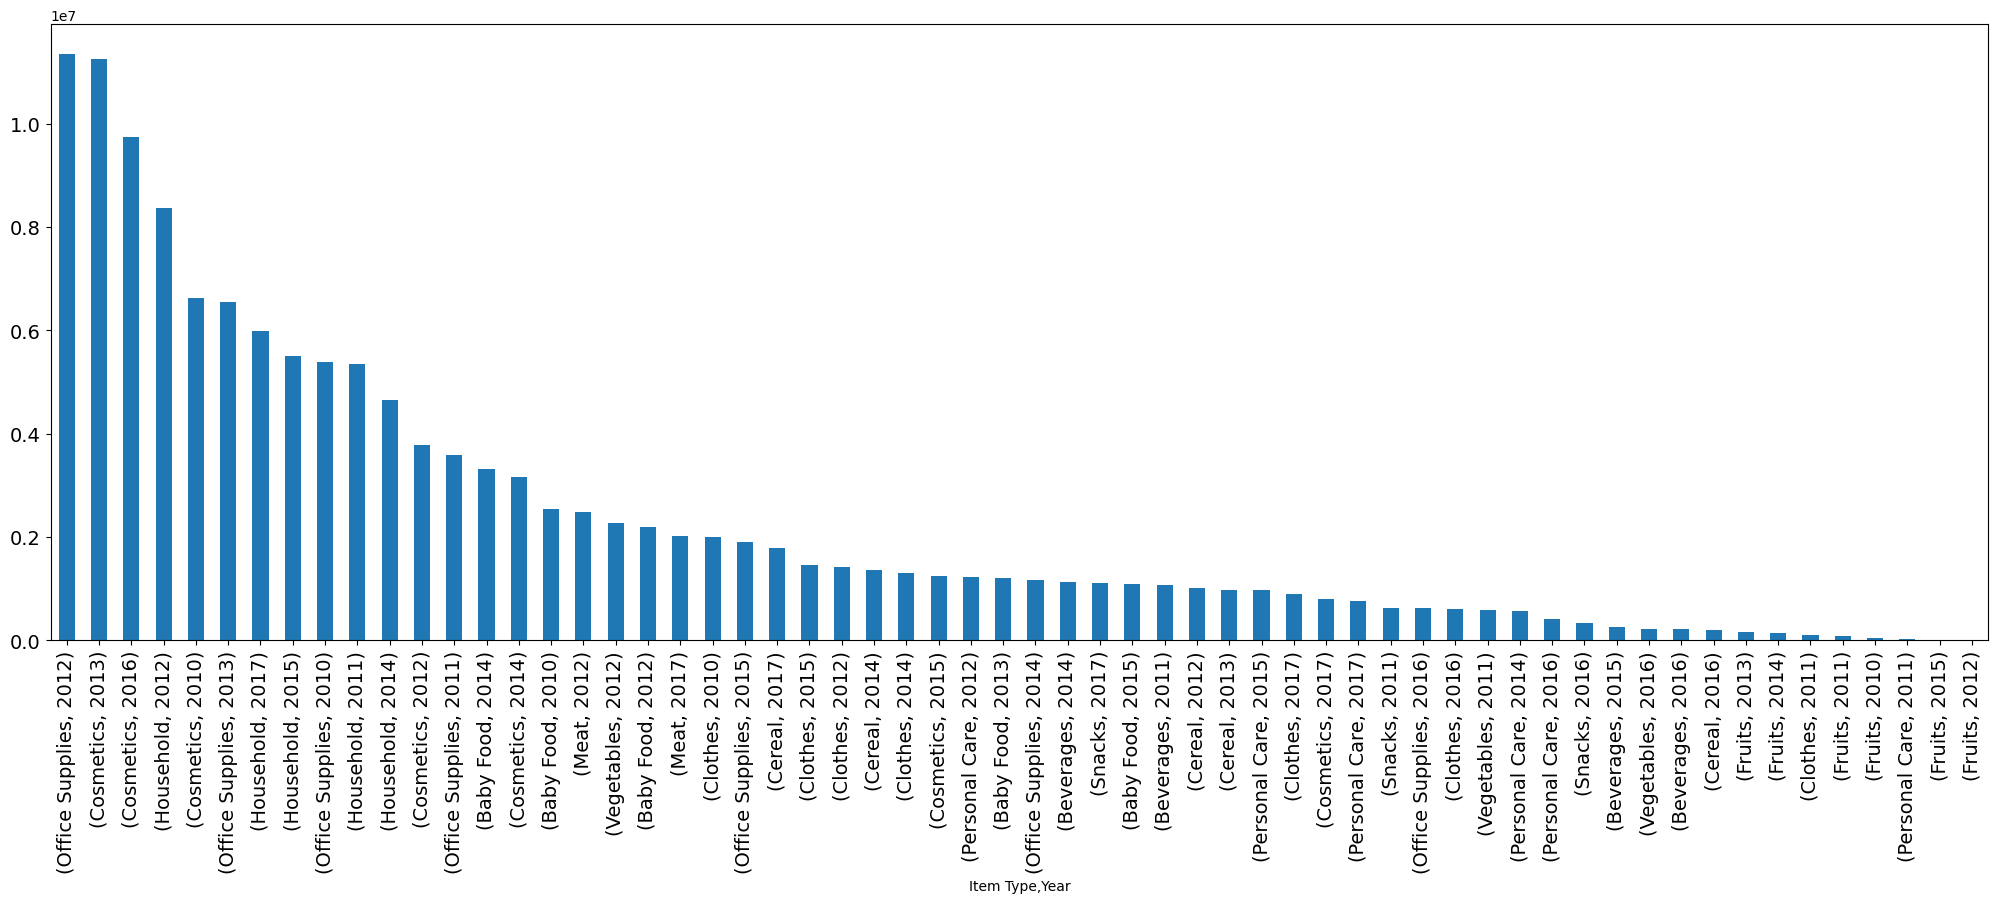

In [51]:
yearly_sales_data['Total Sales'].plot(figsize=(25,8),kind="bar",fontsize=14)
plt.show()

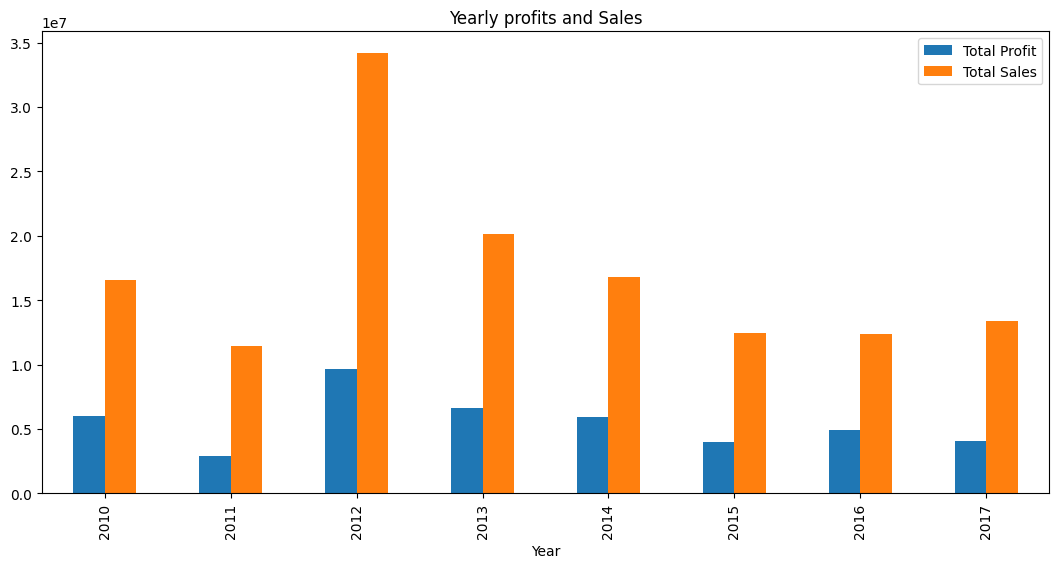

In [52]:
Yearly_sales.set_index("Year")[["Total Profit","Total Sales"]].plot(kind="bar",figsize=(13,6))
plt.title("Yearly profits and Sales")
plt.show()

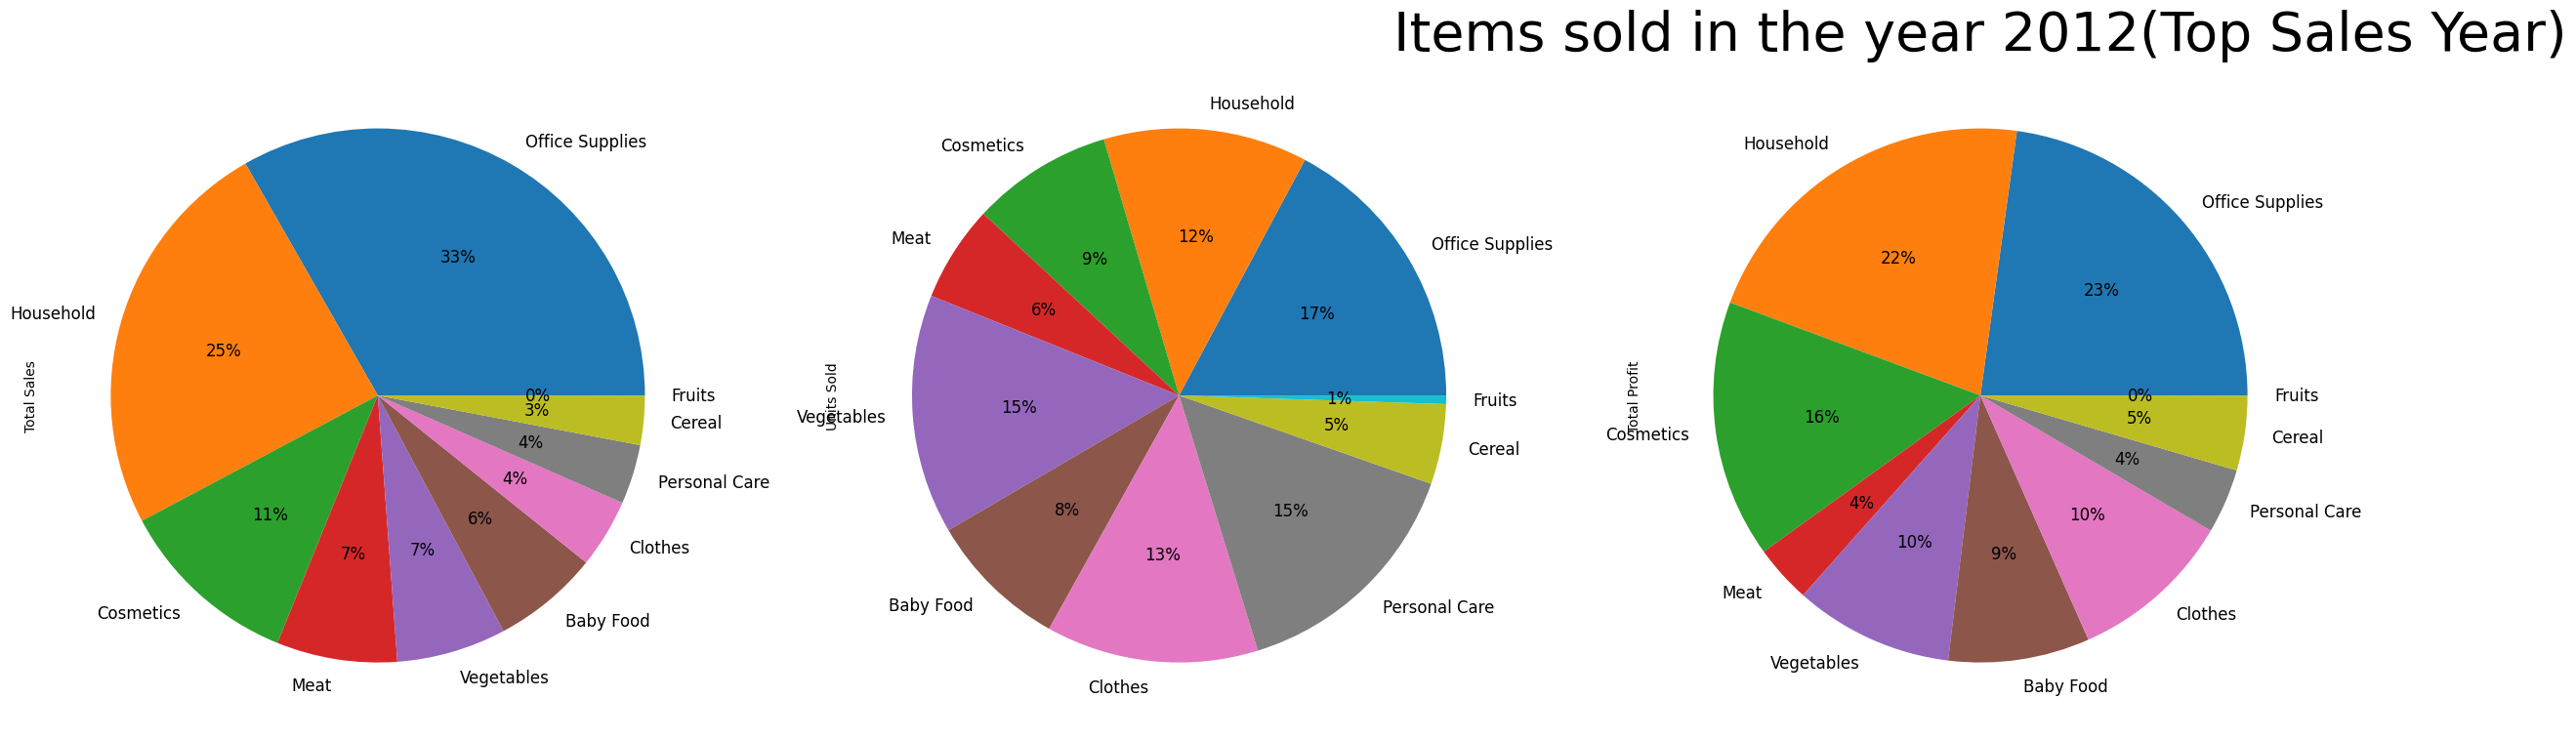

In [53]:
#Maximium item contribution in top sale years
yearly_sales_data.reset_index()[yearly_sales_data.reset_index()['Year']==2012].set_index("Item Type")[["Total Sales","Units Sold","Total Profit"]].plot(kind="pie",subplots=True,autopct='%1.0f%%',fontsize=12,legend=False,figsize=(30,13))
plt.title("Items sold in the year 2012(Top Sales Year)",loc="center",fontsize=40)
plt.show()

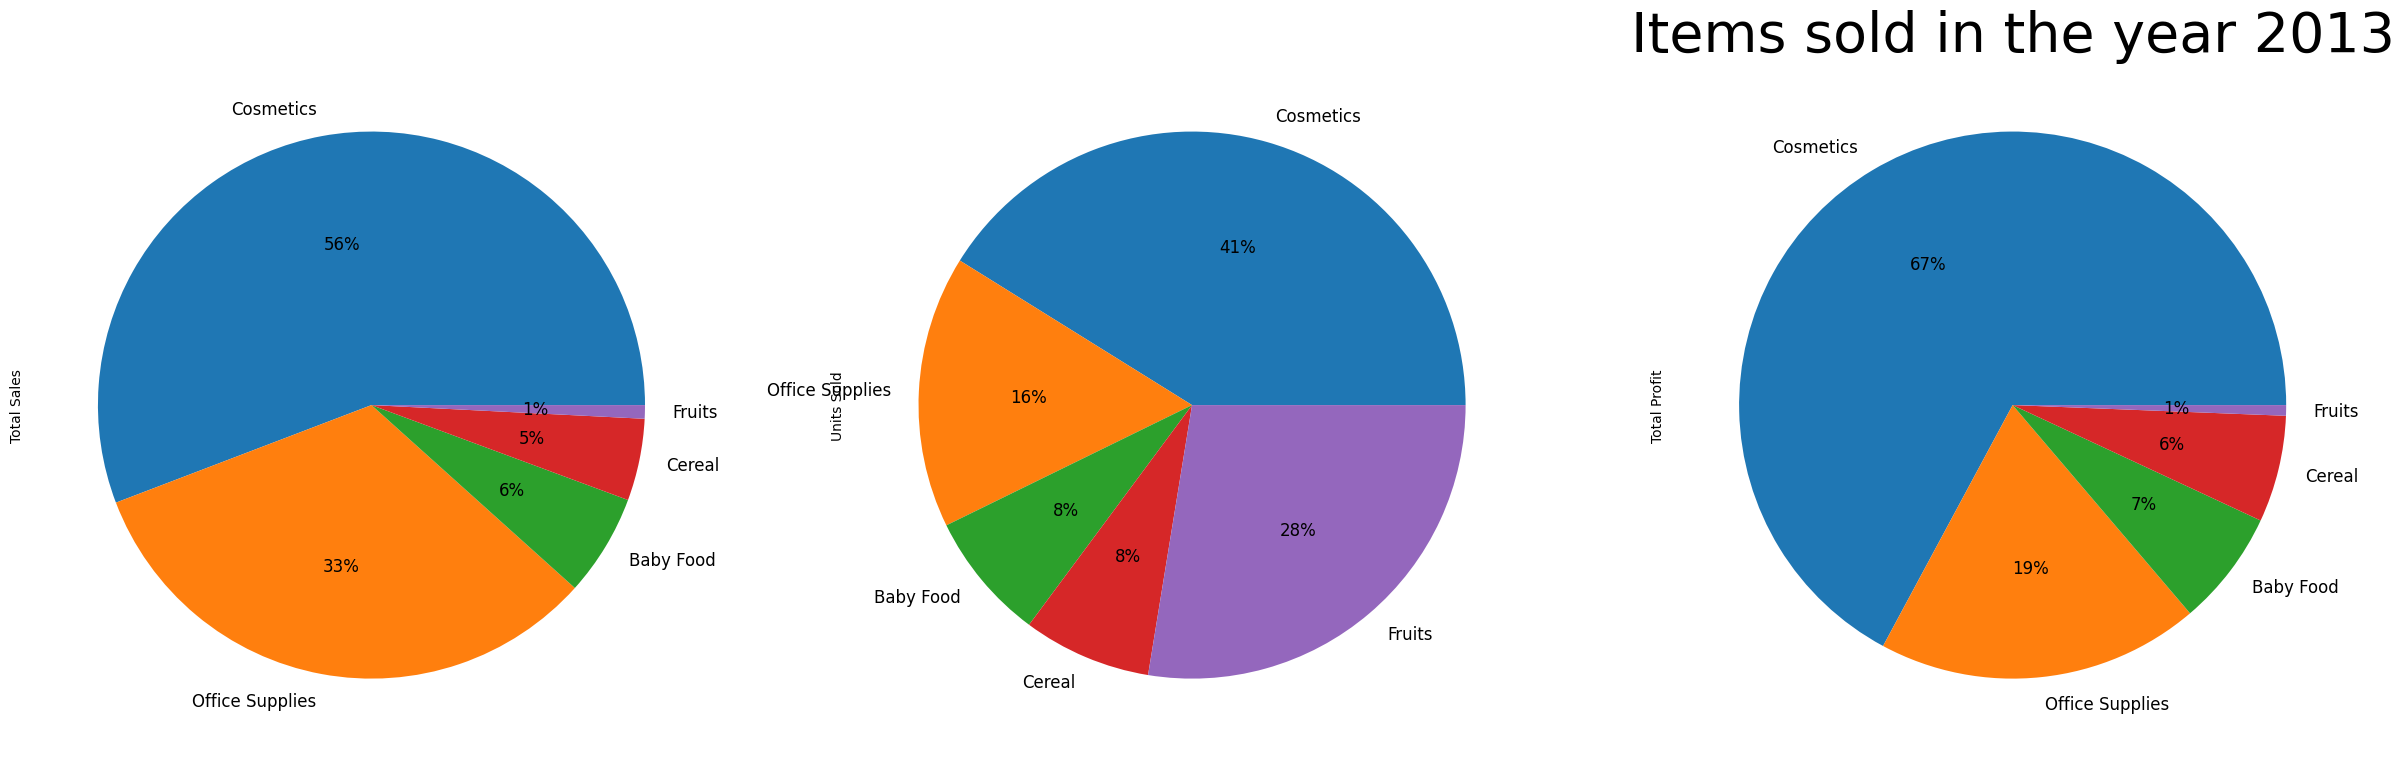

In [54]:
yearly_sales_data.reset_index()[yearly_sales_data.reset_index()['Year']==2013].set_index("Item Type")[["Total Sales","Units Sold","Total Profit"]].plot(kind="pie",subplots=True,autopct='%1.0f%%',fontsize=12,legend=False,figsize=(30,13))
plt.title("Items sold in the year 2013",loc="center",fontsize=40)
plt.show()

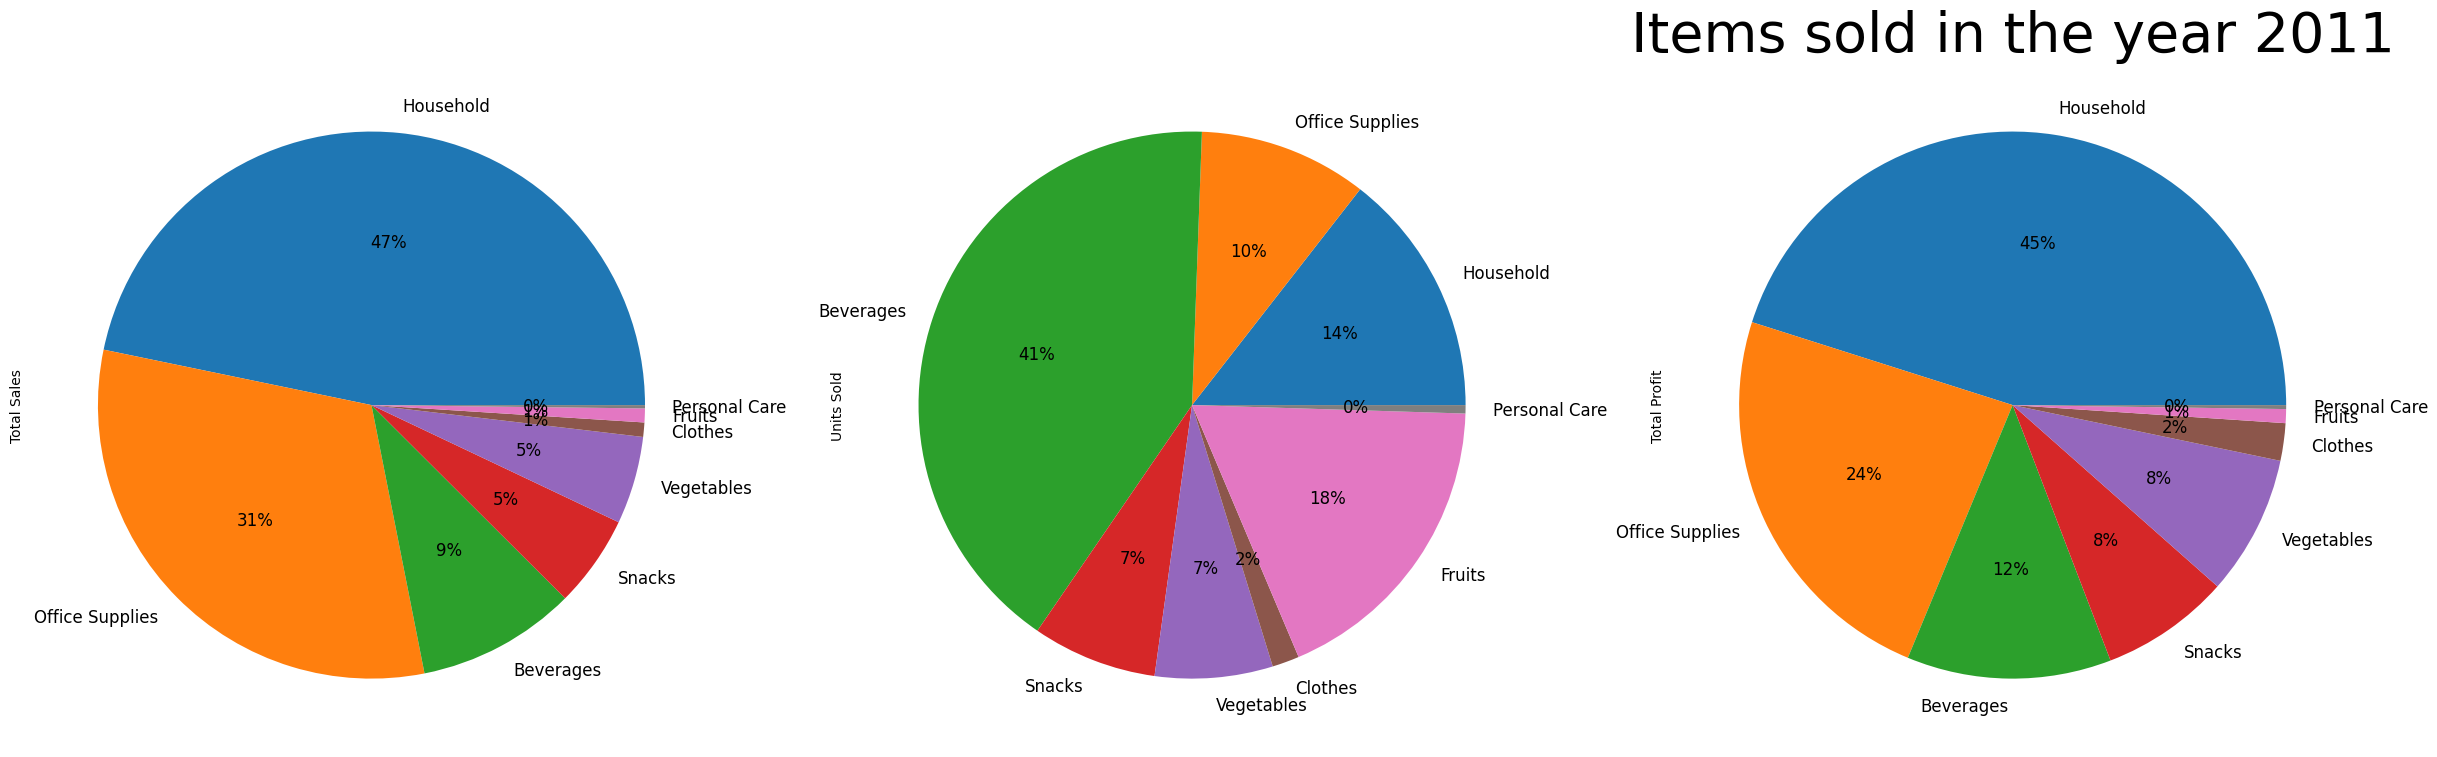

In [55]:
yearly_sales_data.reset_index()[yearly_sales_data.reset_index()['Year']==2011].set_index("Item Type")[["Total Sales","Units Sold","Total Profit"]].plot(kind="pie",subplots=True,autopct='%1.0f%%',fontsize=12,legend=False,figsize=(30,13))
plt.title("Items sold in the year 2011",loc="center",fontsize=40)
plt.show()

Yearly Insights:
    
yearly profits and sales plot shows that it is highest in the year 2012 then followed by 2013, the least is observed in the year 2011

2012(1st top):

    Most Sales are Office Supplies and Household items
    
    Most Unit Sold are of Office Supplies
    
    Most profitable items are of Office supplies and Household
    
2013(2nd top):
    
    Most Sales are Cosmetics and Office supplies
    
    Most Unit Sold are Cosmetics and fruits
    
    Most profitable items are Cosmetics and office supplies
    
2011(Least sales):
    
    Most Sales are Household and Office supplies
    
    Most Unit Sold are beverages and fruits
    
    Most profitable items are Household

### Yearly-Month Sales Analysis

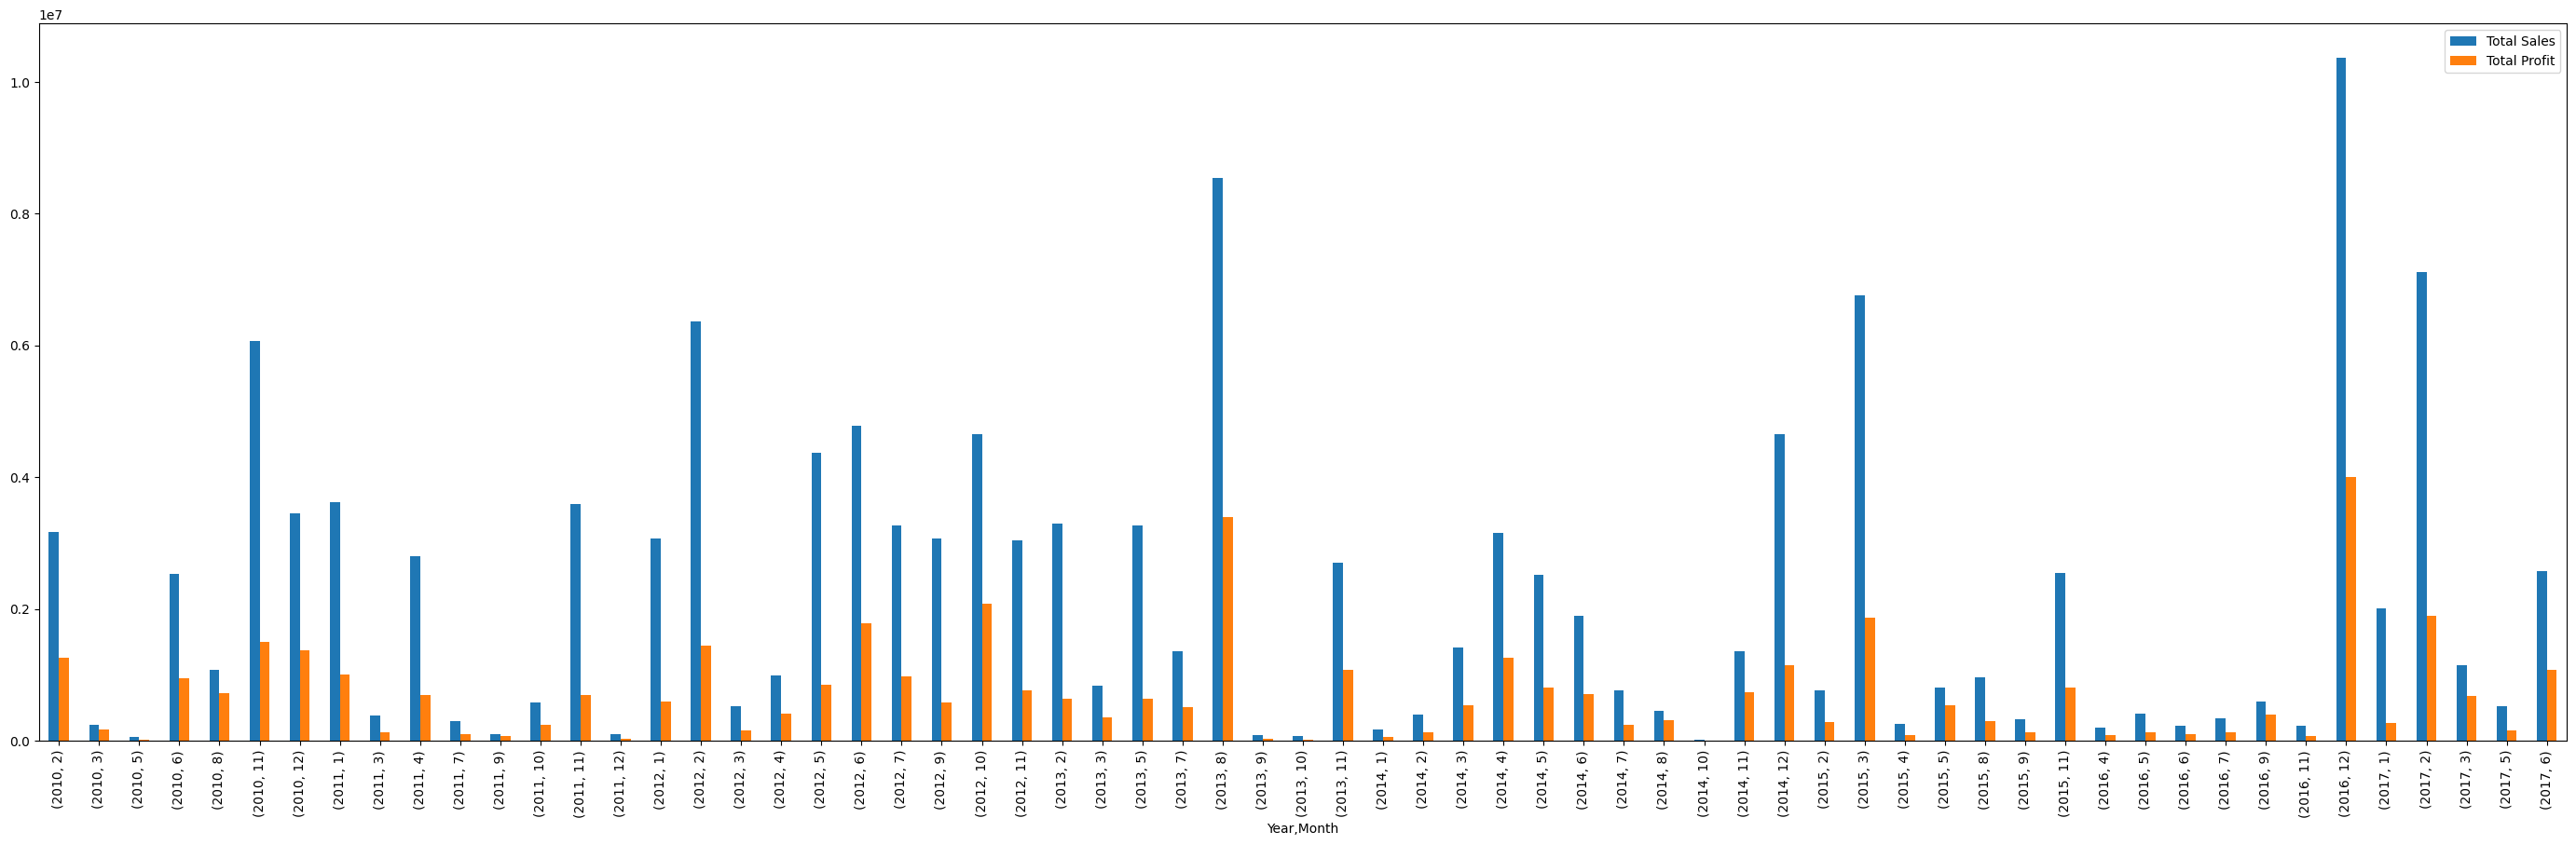

In [56]:
YearlyMonth=df_amazon.groupby(["Year","Month"]).sum(numeric_only=True)
YearlyMonth[["Total Sales","Total Profit"]].plot(kind="bar",figsize=(35,10))
plt.show()

<Axes: xlabel='Year,Month'>

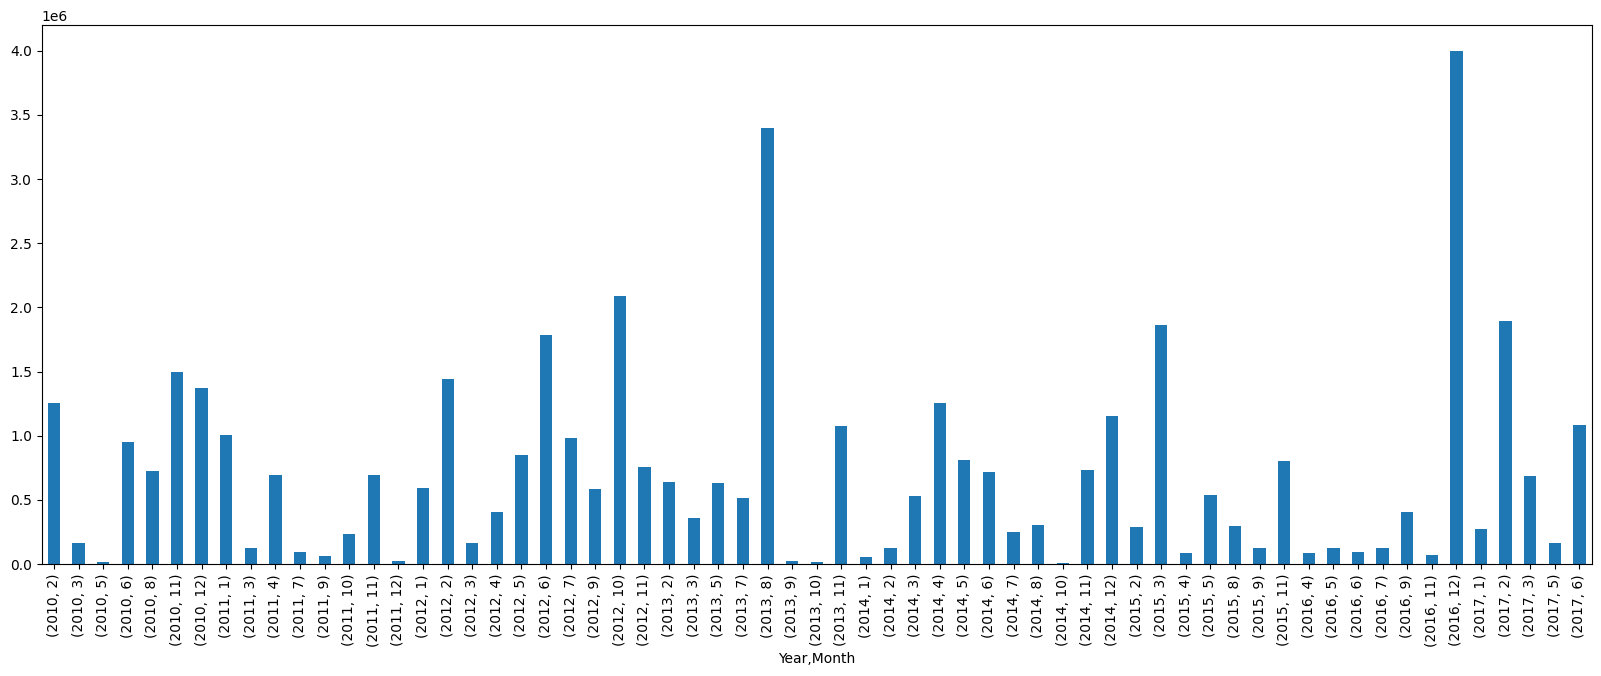

In [57]:
YearlyMonth["Total Profit"].plot(kind="bar",figsize=(20,7))

In [58]:
YearlyMonth=df_amazon.groupby(["Item Type","Year","Month"]).sum(numeric_only=True)

In [59]:
#units sold from 2010-2017
print(f"""Minimum units sold
{YearlyMonth["Units Sold"][YearlyMonth["Units Sold"]==YearlyMonth["Units Sold"].min()]}""")
print(f"""

Maximum units sold
{YearlyMonth["Units Sold"][YearlyMonth["Units Sold"]==YearlyMonth["Units Sold"].max()]}""")

Minimum units sold
Item Type   Year  Month
Vegetables  2011  7        124
Name: Units Sold, dtype: int64


Maximum units sold
Item Type  Year  Month
Cosmetics  2016  12       22308
Name: Units Sold, dtype: int64


<Axes: title={'center': 'Items more than avg unit sold'}, xlabel='Item Type,Year,Month'>

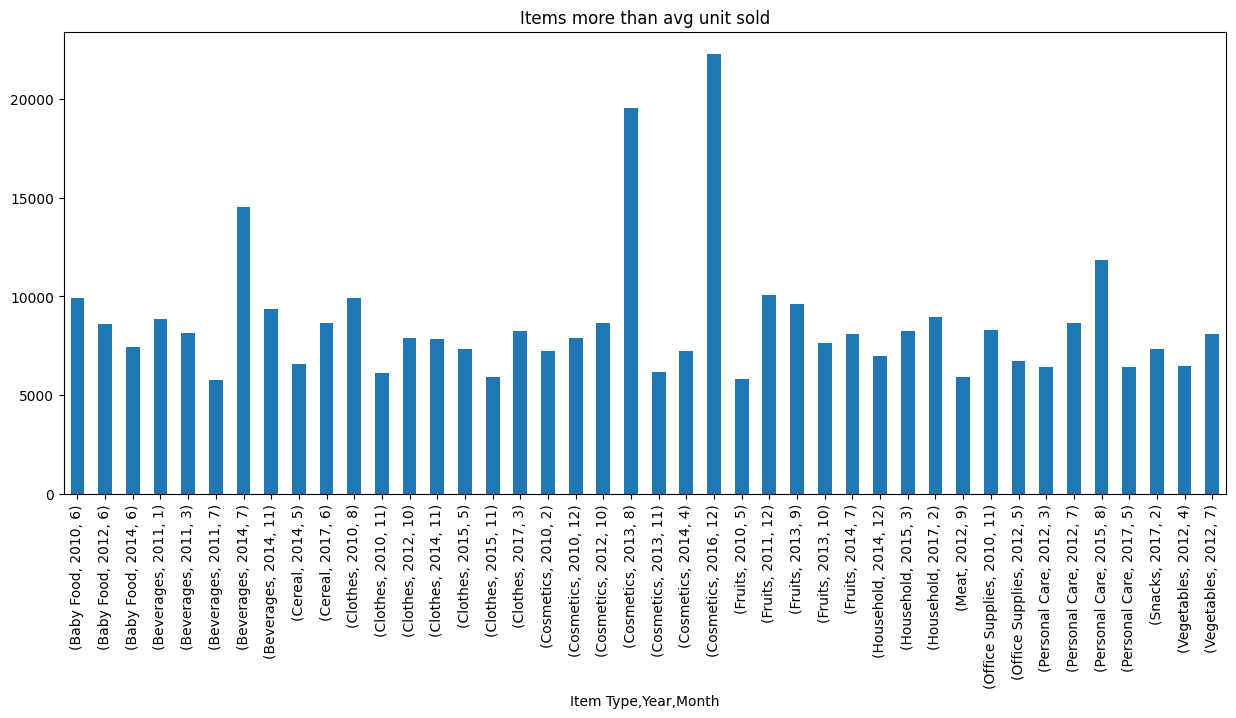

In [60]:
#Items more than average units sold
Average_unit_sold=YearlyMonth["Units Sold"].mean()
YearlyMonth["Units Sold"][YearlyMonth["Units Sold"]>Average_unit_sold].plot(kind="bar",figsize=(15,6),title="Items more than avg unit sold")

In [61]:
YearlyMonth_Region=df_amazon.groupby(["Region","Country","Item Type","Year","Month"]).sum(numeric_only=True)
YearlyMonth_sum=YearlyMonth_Region.reset_index()

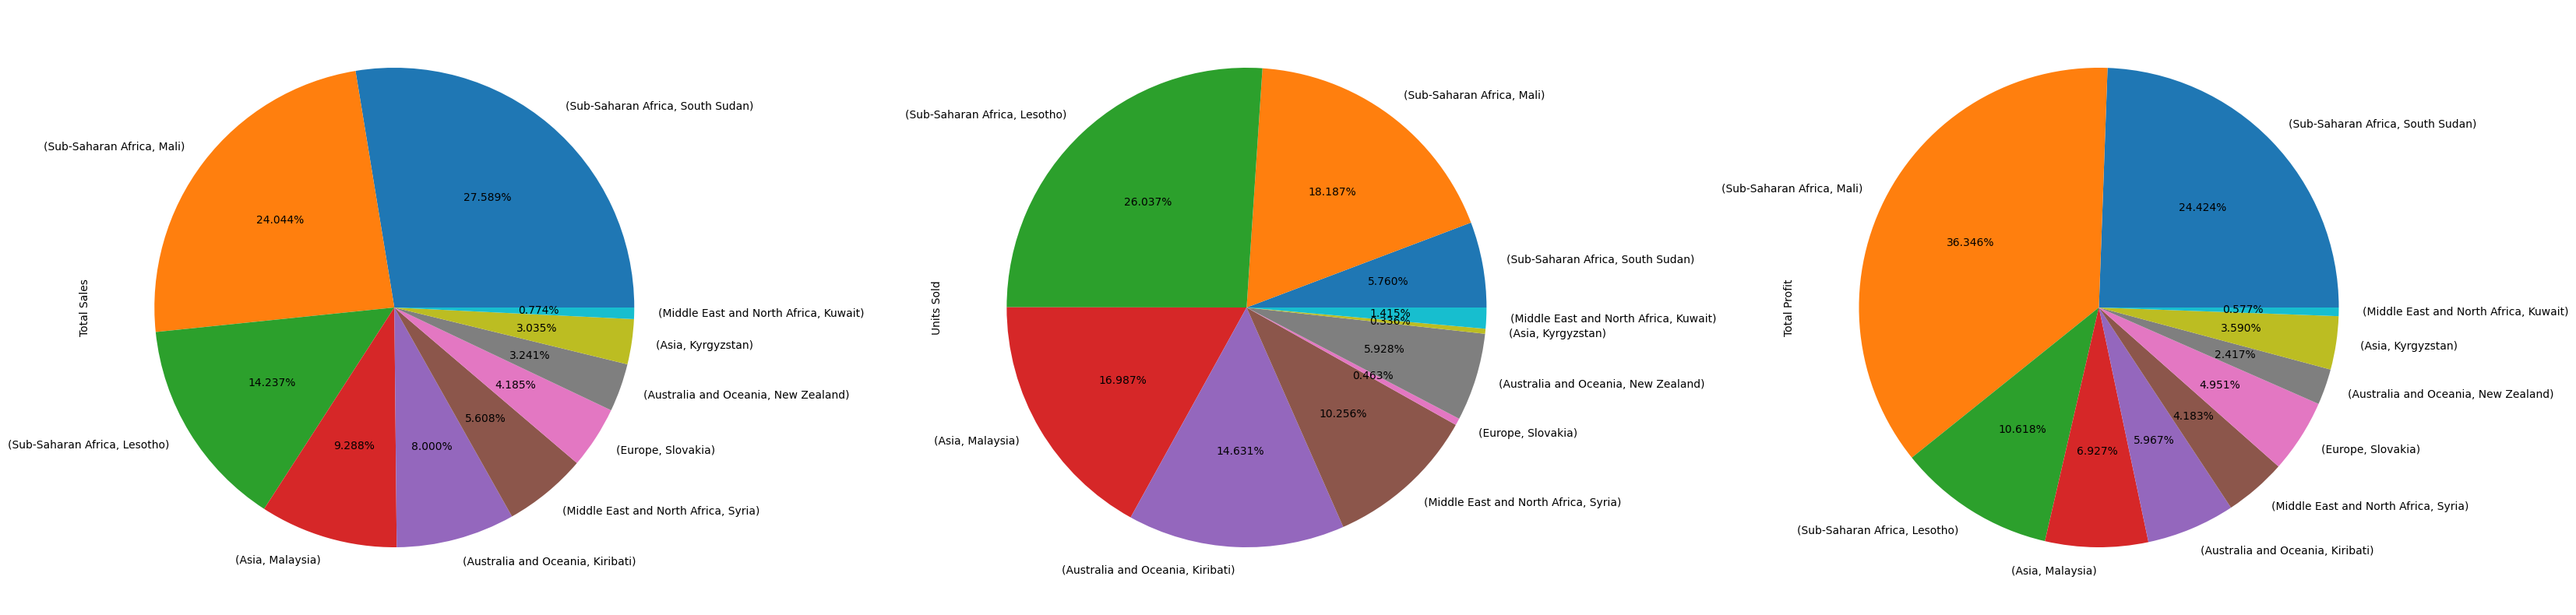

In [62]:
YearlyMonth_sum.groupby(["Region","Country"])[["Total Sales","Units Sold","Total Profit"]].sum().sort_values("Total Sales",ascending=False).tail(10).plot(kind="pie",autopct="%0.3f%%",subplots=True,legend=False,figsize=(40,10))
plt.rc("font",size=14)
plt.show()

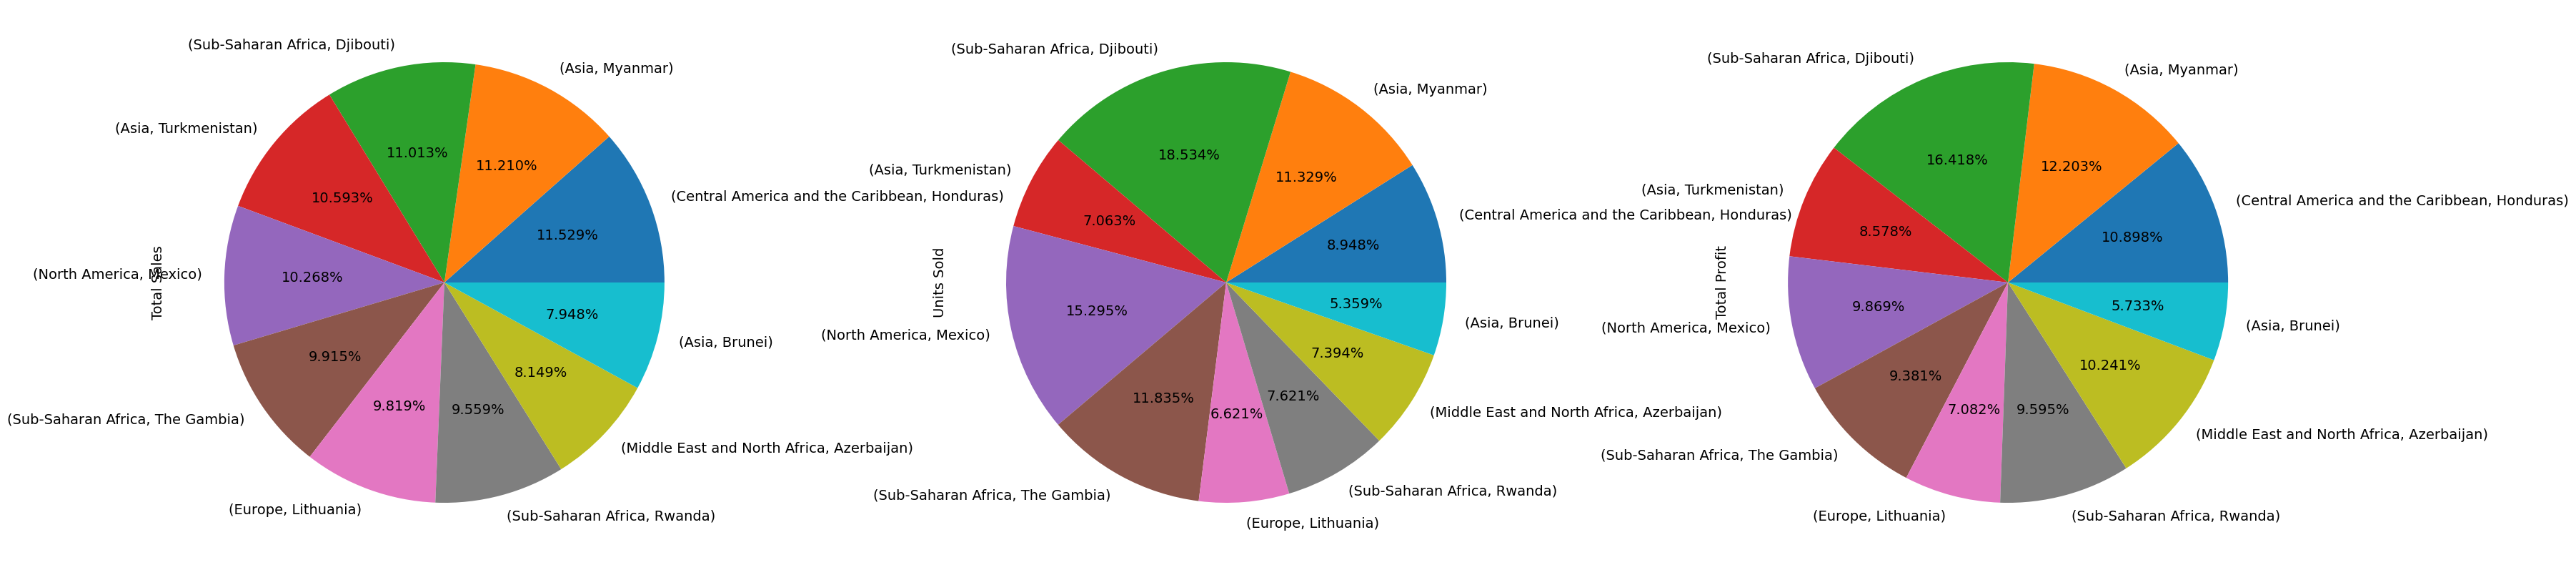

In [63]:
YearlyMonth_sum.groupby(["Region","Country"])[["Total Sales","Units Sold","Total Profit"]].sum().sort_values("Total Sales",ascending=False).head(10).plot(kind="pie",autopct="%0.3f%%",subplots=True,legend=False,figsize=(40,10))
plt.rc("font",size=14)
plt.show()

##### Yearly-Month Analysis

Highest Sales and profit is in December 2016

Second highest is in August 2013

Maximum units sold "Cosmetics" in December 2016 with 22308 units

Minimum units sold "Vegetables" in July 2011 with 124 units

Maximum frequently ordered item in overall months and years

Maximum Sales is from Sub-Saharan Africa, South Sudan

Maximum Unit Sold is from Lesotho

Maximum Profit is from Sub-Saharan Africa, Mali

Minimum Sales, Unit Sold, and Profit is from Asia, Brunie.

## Observations:
1. The sales trends exhibit fluctuations month-wise and year-wise, which could be due to seasonality, promotional events, or market conditions.
2. Identifying the top-selling products and regions can help in strategizing marketing efforts and inventory management.  